Seed used for simulation: 256552208


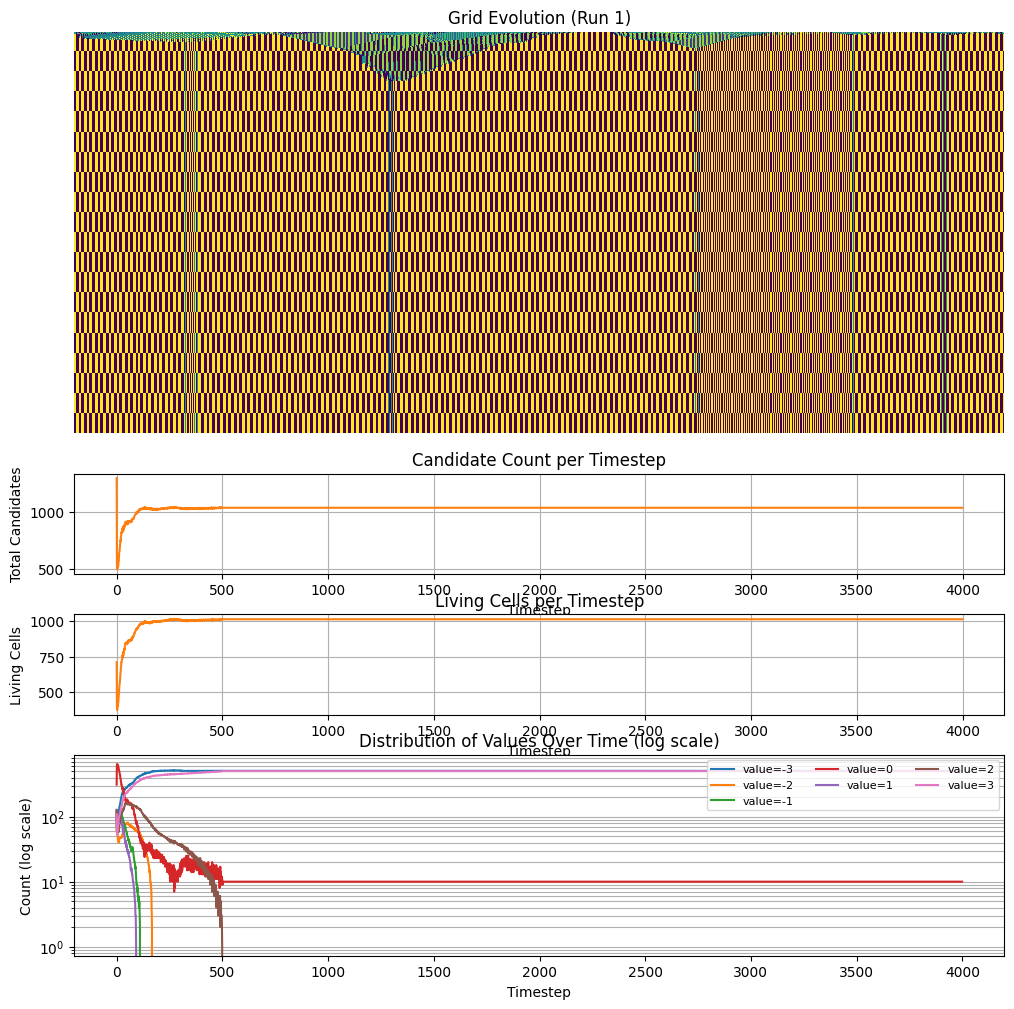

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import os
import math

from symba_alice_2026.basic_barricelli import (
    gather_replication_candidate,
    norm_zero,
)


TIMESTEPS = 4000
SIZE = 1024
MAX_VAL = 3
#SEED = 1701

V_MIN = -MAX_VAL
V_MAX = MAX_VAL+1
SEED = np.random.SeedSequence().generate_state(1)[0]
#SEED = 4181047252
print("Seed used for simulation:", SEED)

rng = np.random.default_rng(seed=SEED)
grid = np.zeros((TIMESTEPS, SIZE)).astype(int)

# Initialise with sparse random
grid[0, :] = rng.integers(-MAX_VAL, MAX_VAL + 1, size=(SIZE))
grid[0, rng.choice(np.arange(SIZE), size=int(SIZE * (1 / 5)), replace=False)] = 0


candidate_count = []
living_cells = []
value_range = np.arange(-MAX_VAL, MAX_VAL+1)
value_distributions = np.zeros((TIMESTEPS, len(value_range)), dtype=int)

for step in range(1, TIMESTEPS):
    candidates = gather_replication_candidate(grid[step - 1, :])
    candidate_count.append(sum(len(c) for c in candidates))
    living_cells.append(np.count_nonzero(grid[step - 1, :]))
    grid[step, :] = norm_zero(grid[step - 1, :], candidates)
    # For value distribution, count occurrences of each value at this step
    counts = [(grid[step, :] == v).sum() for v in value_range]
    value_distributions[step, :] = counts
# At t=0
value_distributions[0, :] = [(grid[0, :] == v).sum() for v in value_range]

# Set up colors for value lines
color_count = max(10, len(value_range))
value_cmap = plt.colormaps['tab10']
value_colors = [value_cmap(i % color_count) for i in range(len(value_range))]

fig, axs = plt.subplots(4, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [4, 1, 1, 2]})

# Plot the grid evolution
axs[0].imshow(grid, aspect="auto", interpolation="none", vmin=-MAX_VAL, vmax=MAX_VAL)
axs[0].set_axis_off()
axs[0].set_title(f"Grid Evolution (Run {1})")

# Plot the candidate counts over time
axs[1].plot(candidate_count, color='tab:orange')
axs[1].set_xlabel("Timestep")
axs[1].set_ylabel("Total Candidates")
axs[1].set_title("Candidate Count per Timestep")
axs[1].grid(True)

# Plot the living cells over time
axs[2].plot(living_cells, color='tab:orange')
axs[2].set_xlabel("Timestep")
axs[2].set_ylabel("Living Cells")
axs[2].set_title("Living Cells per Timestep")
axs[2].grid(True)

# Plot the distribution of values over time (log plot, time-series for each value)
for idx, v in enumerate(value_range):
    axs[3].plot(
        np.arange(TIMESTEPS),
        value_distributions[:, idx],
        label=f'value={v}',
        color=value_colors[idx]
    )
axs[3].set_xlabel("Timestep")
axs[3].set_ylabel("Count (log scale)")
axs[3].set_title("Distribution of Values Over Time (log scale)")
axs[3].set_yscale('log')
axs[3].legend(loc='upper right', ncol=3, fontsize=8)
axs[3].grid(True, which='both', axis='y')



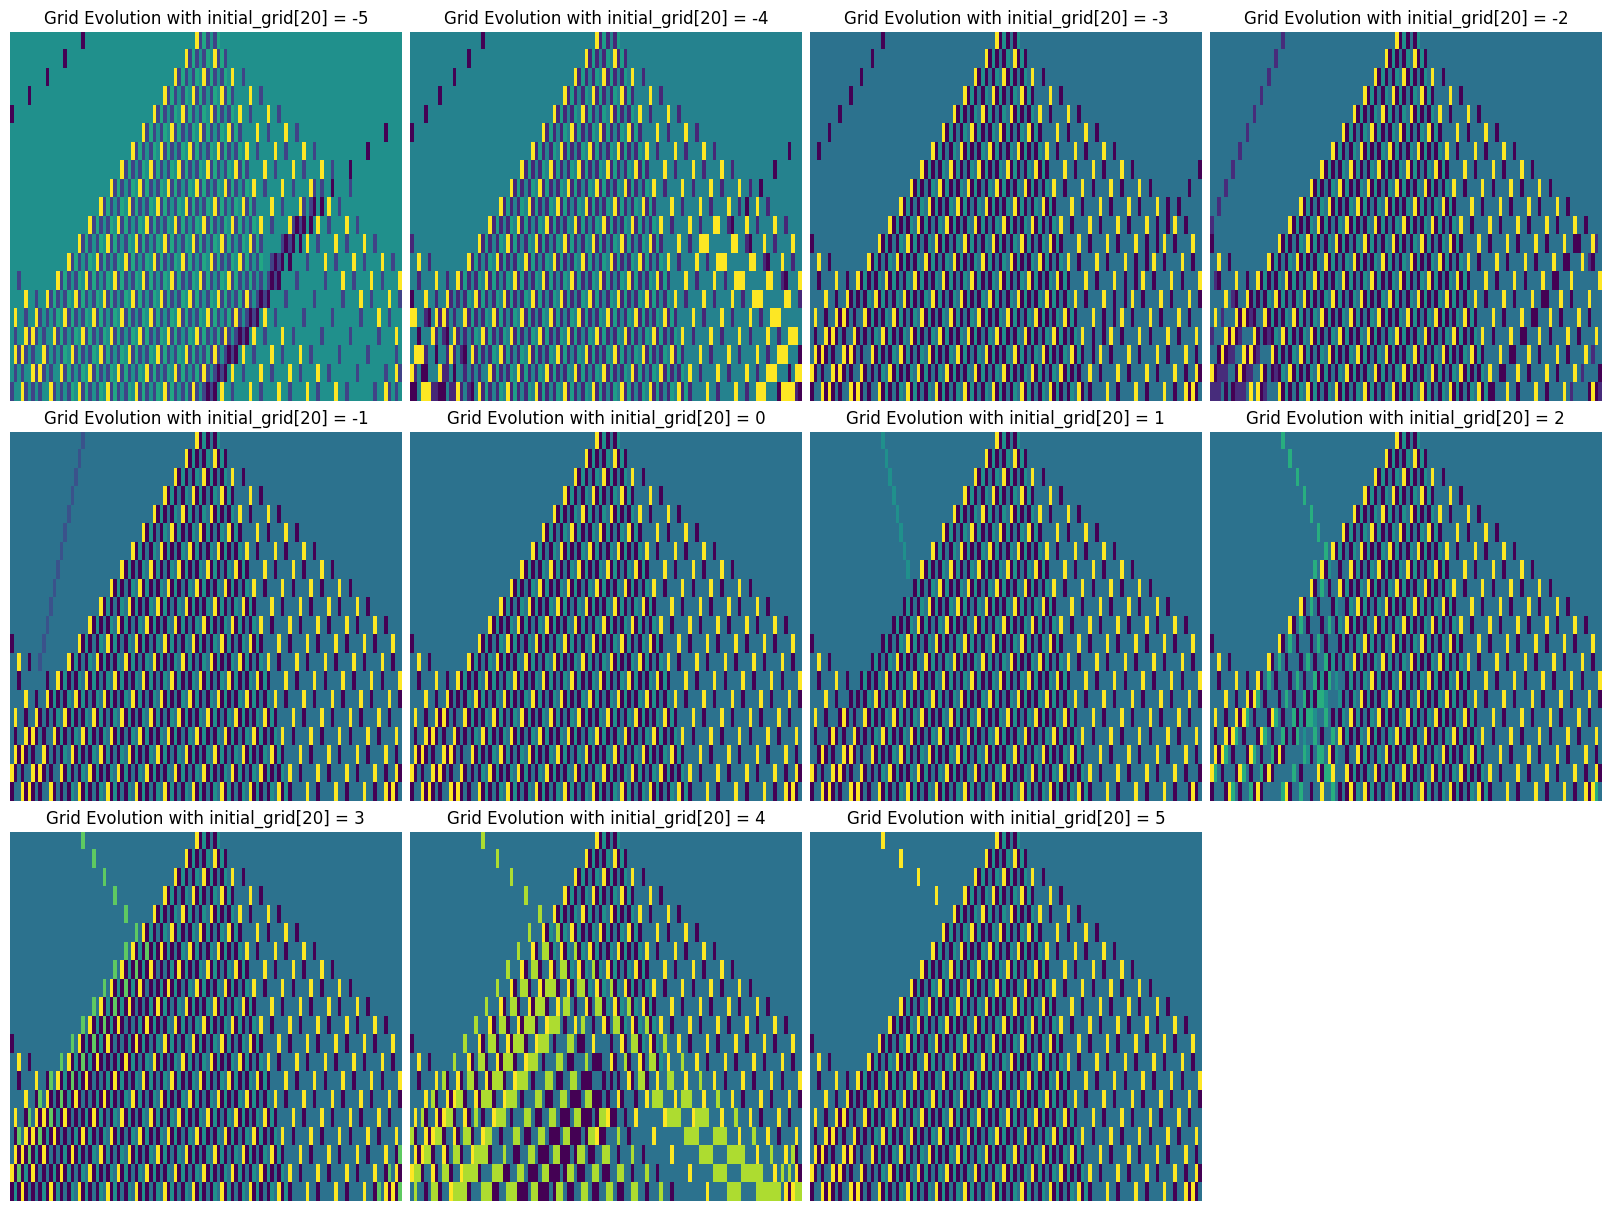

In [ ]:
padding = 50
initial_grid = [0]*padding + [0, 0, 5, -3, 1, -3, 0, -3, 1, 0] + [0]*padding

max_value = 5
min_value = -5

TIMESTEPS = 20
MAX_VAL = 10
SIZE = len(initial_grid)

num_plots = max_value - min_value + 1
ncols = math.ceil(math.sqrt(num_plots))
nrows = math.ceil(num_plots / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows), constrained_layout=True)

# Flatten axs for easy indexing
axs_flat = axs.flatten() if num_plots > 1 else [axs]

for idx, i in enumerate(range(min_value, max_value + 1)):
    # Prepare the initial conditions for this run
    ig = initial_grid.copy()
    ig[20] = i

    grid = np.zeros((TIMESTEPS, SIZE), dtype=int)
    grid[0, :] = ig

    candidate_count = []
    # Iteratively apply the replication updates/mutation norms
    for step in range(1, TIMESTEPS):
        candidates = gather_replication_candidate(grid[step - 1, :])
        candidate_count.append(sum(len(c) for c in candidates))
        grid[step, :] = norm_zero(grid[step - 1, :], candidates)

    ax = axs_flat[idx]
    ax.imshow(grid, aspect="auto", interpolation="none")
    ax.set_axis_off()
    ax.set_title(f"Grid Evolution with initial_grid[20] = {i}")

# Hide any unused subplots
for ax in axs_flat[num_plots:]:
    ax.axis("off")

plt.show()

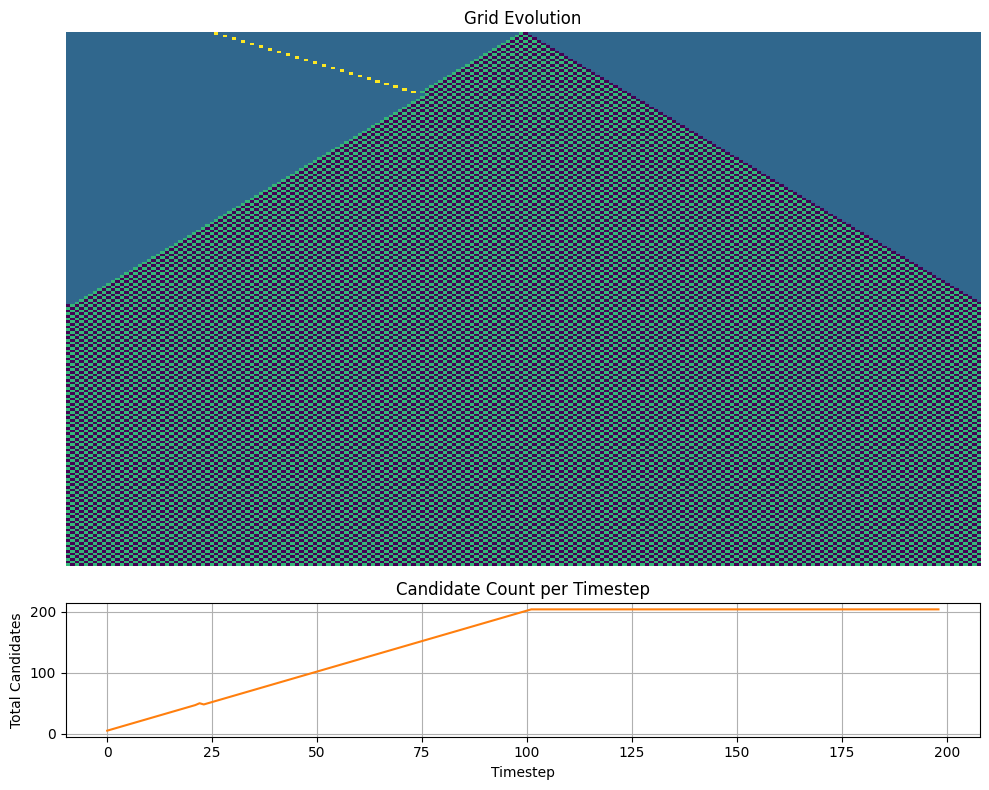

<Figure size 640x480 with 0 Axes>

In [12]:
padding = 100
initial_grid = [0]*padding + [0, 1, -1, 0] + [0]*padding

initial_grid[padding //3 ] = 2

max_value = max(initial_grid)
min_value = min(initial_grid)


TIMESTEPS = 200
MAX_VAL = 2
SIZE = len(initial_grid)

grid = np.zeros((TIMESTEPS, SIZE), dtype=int)
grid[0, :] = initial_grid


candidate_count = []
# Iteratively apply the replication updates/mutation norms
for step in range(1, TIMESTEPS):
    candidates = gather_replication_candidate(grid[step - 1, :])
    candidate_count.append(sum(len(c) for c in candidates))
    grid[step, :] = norm_zero(grid[step - 1, :], candidates)
    #print(grid[step, :])

# View the final state!
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={"height_ratios": [4, 1]})

# Plot the grid evolution
axs[0].imshow(grid, aspect="auto", interpolation="none")
axs[0].set_axis_off()
axs[0].set_title("Grid Evolution")

# Plot the candidate counts over time
axs[1].plot(candidate_count, color='tab:orange')
axs[1].set_xlabel("Timestep")
axs[1].set_ylabel("Total Candidates")
axs[1].set_title("Candidate Count per Timestep")
axs[1].grid(True)

import os

plt.tight_layout()
os.makedirs("out", exist_ok=True)
plt.savefig("out/1_minus_1.png", bbox_inches="tight", transparent=True, dpi=200)
plt.show()

# Plot the candidate counts over time
axs[1].plot(candidate_count, color='tab:orange')
axs[1].set_xlabel("Timestep")
axs[1].set_ylabel("Total Candidates")
axs[1].set_title("Candidate Count per Timestep")
axs[1].grid(True)

plt.tight_layout()


In [100]:
import os
import matplotlib as mpl

# Run 50 simulations and store plots of each
SIMULATIONS = 50
TIMESTEPS = 1000
MAX_VAL = 5
padding = 256

os.makedirs("out/multi_runs", exist_ok=True)

for run in range(SIMULATIONS):
    # Random initial creature for each simulation
    initial_creature = list(np.random.randint(-MAX_VAL, MAX_VAL + 1, 10))
    initial_grid = [0]*padding + initial_creature + [0]*padding

    SIZE = len(initial_grid)

    grid = np.zeros((TIMESTEPS, SIZE), dtype=int)
    grid[0, :] = initial_grid

    candidate_count = []
    living_cells = []
    value_range = np.arange(-MAX_VAL, MAX_VAL+1)
    value_distributions = np.zeros((TIMESTEPS, len(value_range)), dtype=int)

    for step in range(1, TIMESTEPS):
        candidates = gather_replication_candidate(grid[step - 1, :])
        candidate_count.append(sum(len(c) for c in candidates))
        living_cells.append(np.count_nonzero(grid[step - 1, :]))
        grid[step, :] = norm_zero(grid[step - 1, :], candidates)
        # For value distribution, count occurrences of each value at this step
        counts = [(grid[step, :] == v).sum() for v in value_range]
        value_distributions[step, :] = counts
    # At t=0
    value_distributions[0, :] = [(grid[0, :] == v).sum() for v in value_range]

    # Set up colors for value lines
    color_count = max(10, len(value_range))
    value_cmap = mpl.colormaps['tab10']
    value_colors = [value_cmap(i % color_count) for i in range(len(value_range))]

    fig, axs = plt.subplots(4, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [4, 1, 1, 2]})

    # Plot the grid evolution
    axs[0].imshow(grid, aspect="auto", interpolation="none", vmin=-MAX_VAL, vmax=MAX_VAL)
    axs[0].set_axis_off()
    axs[0].set_title(f"Grid Evolution (Run {run+1})")

    # Plot the candidate counts over time
    axs[1].plot(candidate_count, color='tab:orange')
    axs[1].set_xlabel("Timestep")
    axs[1].set_ylabel("Total Candidates")
    axs[1].set_title("Candidate Count per Timestep")
    axs[1].grid(True)

    # Plot the living cells over time
    axs[2].plot(living_cells, color='tab:orange')
    axs[2].set_xlabel("Timestep")
    axs[2].set_ylabel("Living Cells")
    axs[2].set_title("Living Cells per Timestep")
    axs[2].grid(True)

    # Plot the distribution of values over time (log plot, time-series for each value)
    for idx, v in enumerate(value_range):
        axs[3].plot(
            np.arange(TIMESTEPS),
            value_distributions[:, idx],
            label=f'value={v}',
            color=value_colors[idx]
        )
    axs[3].set_xlabel("Timestep")
    axs[3].set_ylabel("Count (log scale)")
    axs[3].set_title("Distribution of Values Over Time (log scale)")
    axs[3].set_yscale('log')
    axs[3].legend(loc='upper right', ncol=3, fontsize=8)
    axs[3].grid(True, which='both', axis='y')


    plt.tight_layout()
    out_dir = "/home/mcvjetko/phd/projects/symba-alice-2026/out/norm_0_runs"
    os.makedirs(out_dir, exist_ok=True)
    plt.savefig(f"{out_dir}/{run+1:02d}.png", bbox_inches="tight", transparent=False, dpi=400)
    plt.close(fig)
